In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

import scipy.stats as stats

from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from yellowbrick.regressor import PredictionError, ResidualsPlot
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

plt.rcParams["figure.figsize"] = (9,5)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

---

## Used Car Price Prediction

<br>

In [2]:
df = pd.read_csv('final_scout_not_dummy.csv')

In [3]:
df.sample(3).T

,6714,12216,9077
make_model,Opel Astra,Opel Insignia,Opel Corsa
body_type,Sedans,Station wagon,Compact
price,16495,20890,13990
vat,VAT deductible,VAT deductible,VAT deductible
km,6677.0,23500.0,8000.0
Type,Used,Used,Used
Fuel,Benzine,Benzine,Benzine
Gears,6.0,6.0,6.0
Comfort_Convenience,"Air conditioning,Cruise control,Electrical sid...","Air conditioning,Armrest,Automatic climate con...","Air conditioning,Electrical side mirrors,Heate..."
Entertainment_Media,"Bluetooth,Hands-free equipment,On-board computer","Bluetooth,Digital radio,Hands-free equipment,M...","Bluetooth,Hands-free equipment,On-board comput..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

In [5]:
for i in df.select_dtypes('object').columns:
    if len(df[i].unique())<100:
        print(i , "\n""\n", df[i].value_counts(),"\n","\n","**********************************""\n\n")
        
    else :
        print("\n","***",i,"***","\n")

make_model 

 Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64 
 
 **********************************


body_type 

 Sedans           8004
Station wagon    3677
Compact          3240
Van               817
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64 
 
 **********************************


vat 

 VAT deductible      15044
Price negotiable      871
Name: vat, dtype: int64 
 
 **********************************


Type 

 Used              11095
New                1649
Pre-registered     1364
Employee's car     1011
Demonstration       796
Name: Type, dtype: int64 
 
 **********************************


Fuel 

 Benzine     8548
Diesel      7298
LPG/CNG       64
Electric       5
Name: Fuel, dtype: int64 
 
 ************************

__To do list :__

- _Make_model :_ Drop "Audi A2"
- _Body_type :_ Create another column named 'Other' for Off-Road,Coupe and Convertible columns.
- _Fuel :_ Drop the ones where fuel = electric
- _Drive_chain :_ Drop the ones where Drive_chain = rear
- ** Come back again 'Comfort_Convenience', 'Entertainment_Media','Extras','Safety_Security' columns.

In [6]:
df = df[df['make_model'] != 'Audi A2']

In [7]:
df['body_type'].replace({'Transporter': 'Other',
                        'Off-Road': 'Other',
                        'Coupe': 'Other',
                        'Convertible': 'Other'}, inplace=True)

In [8]:
df.body_type.value_counts()

Sedans           8004
Station wagon    3677
Compact          3240
Van               817
Other             176
Name: body_type, dtype: int64

In [9]:
df = df[df.Fuel != 'Electric']

In [10]:
df.Fuel.value_counts()

Benzine    8548
Diesel     7297
LPG/CNG      64
Name: Fuel, dtype: int64

In [11]:
df.Drive_chain.value_counts()

front    15701
4WD        204
rear         4
Name: Drive_chain, dtype: int64

In [12]:
df = df[df.Drive_chain != 'rear']

In [13]:
df.Drive_chain.value_counts()

front    15701
4WD        204
Name: Drive_chain, dtype: int64

In [14]:
df.drop(['Comfort_Convenience', 'Entertainment_Media','Extras','Safety_Security'], axis = 1, inplace = True)

In [15]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'Type', 'Fuel', 'Gears', 'age', 'Previous_Owners', 'hp_kW', 'Inspection_new', 'Paint_Type', 'Upholstery_type', 'Gearing_Type', 'Displacement_cc', 'Weight_kg', 'Drive_chain', 'cons_comb'], dtype='object')

In [16]:
my_models = df.make_model.unique().tolist()
for i in my_models:
    print("****************")
    print(i)
    print(df[(df.make_model == i)].hp_kW.value_counts())

****************
Audi A1
85.0     890
70.0     793
66.0     465
92.0     172
60.0     156
71.0      56
110.0     30
141.0     16
147.0     14
67.0      12
87.0       4
93.0       3
140.0      1
86.0       1
112.0      1
Name: hp_kW, dtype: int64
****************
Audi A3
85.0     1631
81.0      785
110.0     500
92.0       93
135.0      24
294.0      18
82.0       15
96.0        9
87.0        6
270.0       2
228.0       2
100.0       1
112.0       1
132.0       1
137.0       1
86.0        1
162.0       1
140.0       1
133.0       1
Name: hp_kW, dtype: int64
****************
Opel Astra
110.0    584
81.0     580
100.0    492
77.0     320
92.0     199
66.0      78
74.0      66
147.0     65
70.0      44
85.0      21
78.0      20
103.0     14
101.0      7
82.0       7
118.0      6
112.0      5
60.0       4
76.0       4
80.0       3
67.0       2
88.0       2
84.0       1
149.0      1
Name: hp_kW, dtype: int64
****************
Opel Corsa
66.0    1236
51.0     703
55.0     172
70.0      53
52.0

#### Outliers for kW:

- A3 has 9 (1 time)

- Astra has 1 (7 times)

- Corsa has 1 (7 times)

- Insiginia has 1 (4 times)

- Clio has 4 (1 time)

- Escape has 1 (2 times)


In [17]:
kW_less_10 = df[df.hp_kW < 10].index
df.drop(kW_less_10, axis = 0,inplace = True)

In [18]:
df.hp_kW.sort_values().head()

13755    40.0
8853     40.0
8407     44.0
10297    51.0
10280    51.0
Name: hp_kW, dtype: float64

In [19]:
for col in df.columns:
    print(f"{col}\t:", df[col].nunique())

make_model	: 8
body_type	: 5
price	: 2951
vat	: 2
km	: 6687
Type	: 5
Fuel	: 3
Gears	: 4
age	: 4
Previous_Owners	: 5
hp_kW	: 77
Inspection_new	: 2
Paint_Type	: 3
Upholstery_type	: 2
Gearing_Type	: 3
Displacement_cc	: 68
Weight_kg	: 432
Drive_chain	: 2
cons_comb	: 62


In [20]:
df.age.value_counts()

1.0    4520
0.0    4433
3.0    3676
2.0    3276
Name: age, dtype: int64

In [21]:
df.Gears.value_counts()

6.0    8614
5.0    4256
7.0    2810
8.0     225
Name: Gears, dtype: int64

In [22]:
df.age.value_counts()

1.0    4520
0.0    4433
3.0    3676
2.0    3276
Name: age, dtype: int64

In [23]:
df.Previous_Owners.value_counts()

1.0    14148
2.0     1172
0.0      554
3.0       29
4.0        2
Name: Previous_Owners, dtype: int64

In [24]:
df = df[df.Previous_Owners != 4.0]

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15903 entries, 0 to 15914
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   make_model       15903 non-null  object 
 1   body_type        15903 non-null  object 
 2   price            15903 non-null  int64  
 3   vat              15903 non-null  object 
 4   km               15903 non-null  float64
 5   Type             15903 non-null  object 
 6   Fuel             15903 non-null  object 
 7   Gears            15903 non-null  float64
 8   age              15903 non-null  float64
 9   Previous_Owners  15903 non-null  float64
 10  hp_kW            15903 non-null  float64
 11  Inspection_new   15903 non-null  int64  
 12  Paint_Type       15903 non-null  object 
 13  Upholstery_type  15903 non-null  object 
 14  Gearing_Type     15903 non-null  object 
 15  Displacement_cc  15903 non-null  float64
 16  Weight_kg        15903 non-null  float64
 17  Drive_chain 

<AxesSubplot:>

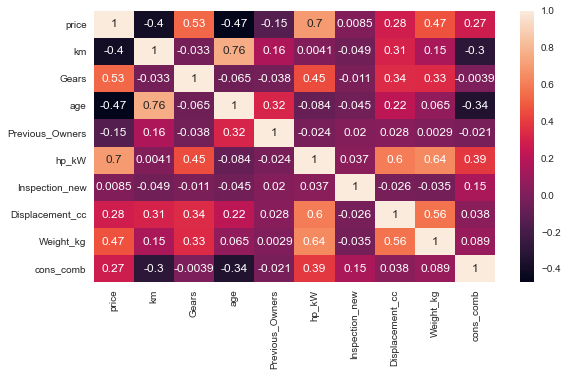

In [26]:
sns.heatmap(df.corr(), annot = True)

In [27]:
for i in df.select_dtypes(['int64','float64']).columns:
        corr_i = df['price'].corr(df[i])
        print(i, " : ",round(corr_i,2))
    

price  :  1.0
km  :  -0.4
Gears  :  0.53
age  :  -0.47
Previous_Owners  :  -0.15
hp_kW  :  0.7
Inspection_new  :  0.01
Displacement_cc  :  0.28
Weight_kg  :  0.47
cons_comb  :  0.27


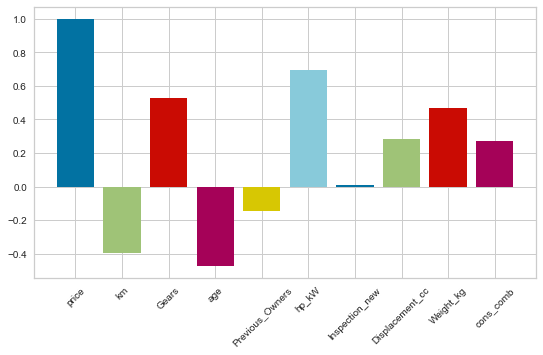

In [28]:
for i in df.select_dtypes(['int64','float64']).columns:
        corr_i = df['price'].corr(df[i])
        plt.bar(i,corr_i)
        plt.xticks(rotation=45)

### Getting Dummies

In [29]:
df.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.0,Used,Diesel,7.0,3.0,2.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1220.0,front,3.8
1,Audi A1,Sedans,14500,Price negotiable,80000.0,Used,Benzine,7.0,2.0,1.0,141.0,0,Metallic,Cloth,Automatic,1798.0,1255.0,front,5.6
2,Audi A1,Sedans,14640,VAT deductible,83450.0,Used,Diesel,7.0,3.0,1.0,85.0,0,Metallic,Cloth,Automatic,1598.0,1135.0,front,3.8
3,Audi A1,Sedans,14500,VAT deductible,73000.0,Used,Diesel,6.0,3.0,1.0,66.0,0,Metallic,Cloth,Automatic,1422.0,1195.0,front,3.8
4,Audi A1,Sedans,16790,VAT deductible,16200.0,Used,Diesel,7.0,3.0,1.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1135.0,front,4.1


In [30]:
df.shape

(15903, 19)

In [31]:
df = pd.get_dummies(df, drop_first=True)

In [32]:
df.shape

(15903, 34)

In [33]:
df.sample(5)

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Other,body_type_Sedans,body_type_Station wagon,body_type_Van,vat_VAT deductible,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Diesel,Fuel_LPG/CNG,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Part/Full Leather,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_front
14852,11270,1647.362609,5.0,0.0,1.0,55.0,0,898.0,1087.0,5.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1
11327,20950,13481.000000,6.0,2.0,1.0,121.0,0,1490.0,1522.0,6.2,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1
12295,19325,29250.000000,6.0,1.0,1.0,100.0,0,1598.0,1503.0,4.5,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,1
5289,24400,1647.362609,7.0,0.0,1.0,85.0,0,1598.0,1360.0,4.0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1
2362,18670,1647.362609,5.0,0.0,1.0,70.0,0,999.0,1165.0,4.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1


In [34]:
df.select_dtypes('object').columns

Index([], dtype='object')

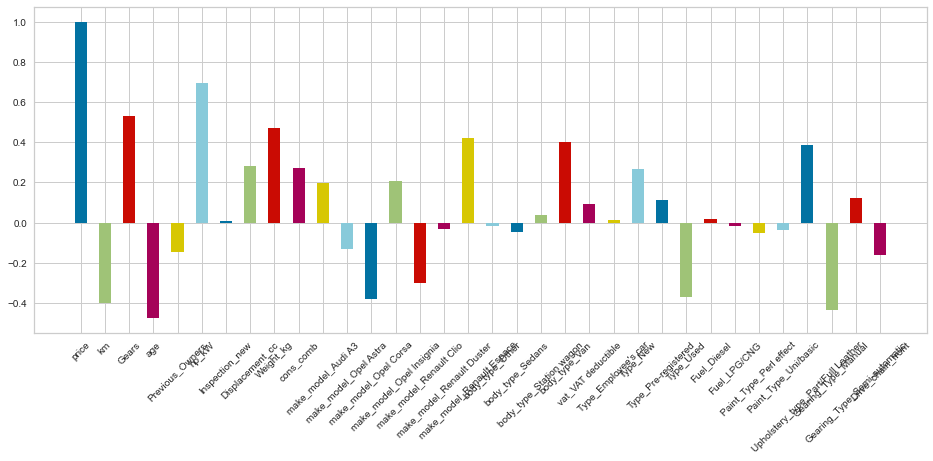

In [35]:
plt.figure(figsize = (16,6))

for i in df.columns:
        corr_i = df['price'].corr(df[i])
        plt.bar(i,corr_i, width = 0.5)
        plt.xticks(rotation=45)
       

In [36]:
df

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Other,body_type_Sedans,body_type_Station wagon,body_type_Van,vat_VAT deductible,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Diesel,Fuel_LPG/CNG,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Part/Full Leather,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_front
0,15770,56013.000000,7.0,3.0,2.0,66.0,1,1422.0,1220.0,3.8,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1
1,14500,80000.000000,7.0,2.0,1.0,141.0,0,1798.0,1255.0,5.6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,14640,83450.000000,7.0,3.0,1.0,85.0,0,1598.0,1135.0,3.8,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1
3,14500,73000.000000,6.0,3.0,1.0,66.0,0,1422.0,1195.0,3.8,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1
4,16790,16200.000000,7.0,3.0,1.0,66.0,1,1422.0,1135.0,4.1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15910,39950,1647.362609,6.0,0.0,1.0,147.0,0,1997.0,1758.0,5.3,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,1
15911,39885,9900.000000,7.0,0.0,1.0,165.0,0,1798.0,1708.0,7.4,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1
15912,39875,15.000000,6.0,0.0,1.0,146.0,1,1997.0,1734.0,5.3,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,1
15913,39700,10.000000,6.0,0.0,1.0,147.0,0,1997.0,1758.0,5.3,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,1


<br>

### Train-Test Split

In [37]:
X = df.drop('price', axis = 1)
y = df['price']

In [38]:
X.shape

(15903, 33)

In [39]:
X

,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Other,body_type_Sedans,body_type_Station wagon,body_type_Van,vat_VAT deductible,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Diesel,Fuel_LPG/CNG,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Part/Full Leather,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_front
0,56013.000000,7.0,3.0,2.0,66.0,1,1422.0,1220.0,3.8,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1
1,80000.000000,7.0,2.0,1.0,141.0,0,1798.0,1255.0,5.6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,83450.000000,7.0,3.0,1.0,85.0,0,1598.0,1135.0,3.8,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1
3,73000.000000,6.0,3.0,1.0,66.0,0,1422.0,1195.0,3.8,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1
4,16200.000000,7.0,3.0,1.0,66.0,1,1422.0,1135.0,4.1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15910,1647.362609,6.0,0.0,1.0,147.0,0,1997.0,1758.0,5.3,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,1
15911,9900.000000,7.0,0.0,1.0,165.0,0,1798.0,1708.0,7.4,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1
15912,15.000000,6.0,0.0,1.0,146.0,1,1997.0,1734.0,5.3,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,1
15913,10.000000,6.0,0.0,1.0,147.0,0,1997.0,1758.0,5.3,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,1


In [40]:
y

0        15770
1        14500
2        14640
3        14500
4        16790
         ...  
15910    39950
15911    39885
15912    39875
15913    39700
15914    40999
Name: price, Length: 15903, dtype: int64

In [41]:
y.shape 

(15903,)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [43]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11927, 33), (3976, 33), (11927,), (3976,))

<br>

## Linear Regression

In [44]:
lrm = LinearRegression()

In [45]:
lrm.fit(X_train, y_train)

LinearRegression()

In [46]:
lrm.score(X_train, y_train)

0.8680715013287061

In [47]:
lrm.score(X_test, y_test)

0.8646451393869881

In [48]:
y_pred = lrm.predict(X_test)

In [49]:
def eval_metrics(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [50]:
eval_metrics(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8646451393869881
MAE 		: 1873.9950780920296
MSE 		: 7353449.626465016
RMSE 		: 2711.7244746590713


### Prediction Error

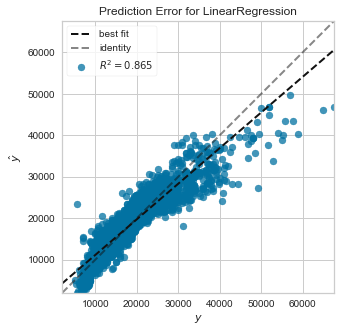

In [52]:
visualizer = PredictionError(lrm)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

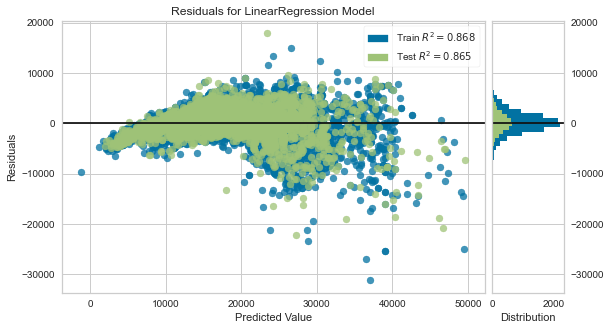

In [54]:
visualizer = ResidualsPlot(lrm)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();